In [1]:
import numpy as np
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("breast_cancer.csv")
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dfSummary(df1)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 30371831.4 (125020585.6)min < med < max:8670.0 < 906024.0 < 911320502.0IQR (CV) : 7943911.0 (0.2),569 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA40lEQVR4nO3csQ3CMBBAUUCUVzsFnSdgFSZIy1qegKlS4NpNqjBBJAMBJP5/rS3rpC+5vP2yLDv9v8OvB9B3HNcOUkqXiBh6Hmmt3Wutt+3G0tZWQ0fEMI7j1PNIKeW03Uj6BL9uCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWN3u+4x5ns8552vPXVc+v+bdtdoPDQoivWKGod0AAAAASUVORK5CYII="">",0(0.0%)
2,diagnosis[object],1. B2. M,357 (62.7%)212 (37.3%),,0(0.0%)
3,radius_mean[float64],Mean (sd) : 14.1 (3.5)min < med < max:7.0 < 13.4 < 28.1IQR (CV) : 4.1 (4.0),456 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABT0lEQVR4nO3cMW7CMBiGYbdCyvJ3DQNL5QvABThBJ06QlTNlywl6pS4dmjlLpEjhABXgXzIG+Xuf2RKRXnDk2OFtXdeA+r0/+wJQxqb0B7ZtezKzbcrYaZr+xnH8fvQ1KSge2sy2Xdf9powdhmH36OtRwdQtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtovjulcc8z4cY4zllLFuat7106KZpPtjSzIOpWwShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFpElmfdnveplmXZhxCSnl8jnyyhne9THXN8JnyYukUQWgShRRBaxEufMPHg2NFt1YT2HDvq+/4rxij19xrVhPZQPIvGPVqE5C/ao5Z7P6HvqGWaZ+oWQWgRhBZx9R7N1mNdroZm67EuTN0iWF5l5Flzh1B23U3ojDxr7hDcz9w/zewncey/L9AFRQZ2yihtjQ4AAAAASUVORK5CYII="">",0(0.0%)
4,texture_mean[float64],Mean (sd) : 19.3 (4.3)min < med < max:9.7 < 18.8 < 39.3IQR (CV) : 5.6 (4.5),479 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABOklEQVR4nO3asU3EMBhAYYOQ0pg2V9CgLAALMAQTpGWtTMBKNBSkdhMpUpjgcrbwhZPf+2pLsfR0vl+y77ZtC2rf/X9vQMd4OPqDfd+/xxhPOWtTSj/zPH9ee08Eh4eOMZ7GcfzOWTtN09O190Ph0Q1x+C+6xLIsr8MwfOSs9Zjfd9Ohu6579Jivw6MbwtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSGq3F6VvBpZ1/UlhJB1I6V6qoQufDXyVuObKnPT99ElfKSwr5nQPlLY5zAGYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhmjmmrIE8e4aGZp4d+3RDWFoCENDIP+jS7QyuBn6glYGt7OhfZTflrOhfZTfFocxCENDOIxVVDKhhxBCSuk5xviVufZPE/0vRhJuL36RJnsAAAAASUVORK5CYII="">",0(0.0%)
5,perimeter_mean[float64],Mean (sd) : 92.0 (24.3)min < med < max:43.8 < 86.2 < 188.5IQR (CV) : 28.9 (3.8),522 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABT0lEQVR4nO3cMUrEQBSH8acIaZ5ttrCRuYBewBNYeYK0nildTuCVbCxMnSYQiAeQjfNgdlzm//3qgQS+7EtChr3Z993Qvtv/PgHUcVf7gH3fv7n7KWftsizf8zx/XPqcFFQP7e6nYRi+ctZO0/Rw6fNRwegWQWgRhBZBaBGEFkFoEYQWQWgRhBZBaBGEFkFoEYQWQWgRhBZBaBHVNx5ErOv6nFJ6z1nLbpRjVx2667p7dqOUwegWQWgRhBZBaBFFHsYie7W3bXsys6wHLJRTJHRwr/ZLiWMihtEtgtAiCC2C0CIILYLQIq76o0YEX7qONROaL13HGN0imvlFRyiOecnQimOe0S2C0CIkR3dEK/dzQv+hlfs5o1sEoUUQWsTZezT7wNpyNjT7wNrCU3dBkVcxs7qvY4QuKPIqZmY2juNrSin3L60f3f0zc+2vC+gHK4p6HYxD7t0AAAAASUVORK5CYII="">",0(0.0%)
6,area_mean[float64],Mean (sd) : 654.9 (351.9)min < med < max:143.5 < 551.1 < 2501.0IQR (CV) : 362.4 (1.9),539 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABOUlEQVR4nO3csW2DQBhAYRJZguLS4iKNxQLOAh7CE1zrtZggXeZJkyLUNEhIeAJbd9JBUN776hMgPRnQod8vy7JU+v9e//oCtI1DiYO0bXsNIRxT1o7j+DsMw2eJ8ypdkdAhhGOM8Sdlbd/37yXOqTzeuiEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoiCKzVzmmafrouu6WstaBvHIehs6ZkJzn+VxVVdKQXV3Xbw7kbe9h6MwJyUu5S9IafEZDGBrC0BCGhjA0hKEhNt8wWYv/jPTcrkPn7KI1TXOOMX6lrCVuxOw6dOYumps2T/iMhjA0hKEhDA2x65extRC/iSNDE7+JI0PnyPz1n0II36nH3vJucQflvFq/rbE9QQAAAA

In [4]:
df1 = df1.drop(['id'], axis = 1)
df1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
def BM_to_num(dia):
    if dia == 'M':
        return 1
    else:
        return 0
    
df1['diagnosis'] = df1['diagnosis'].apply(BM_to_num)
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


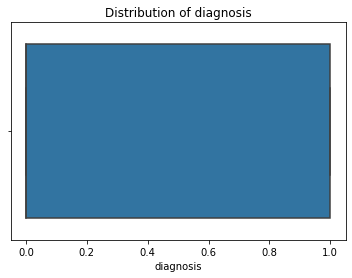

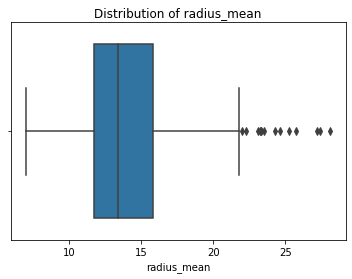

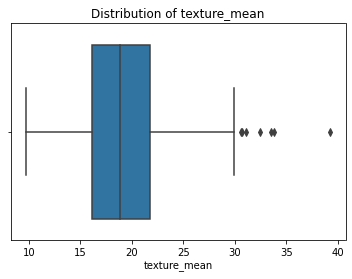

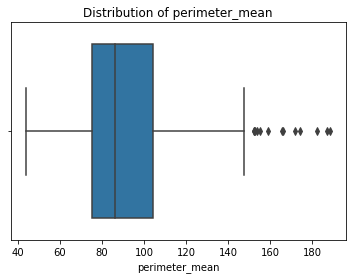

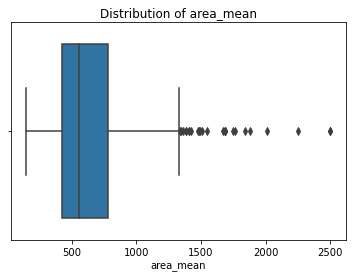

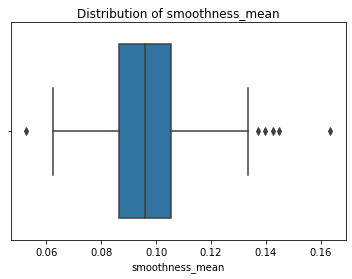

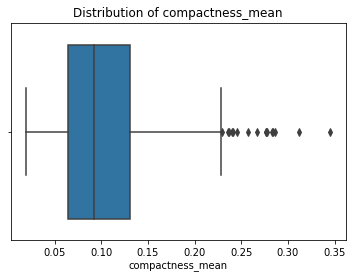

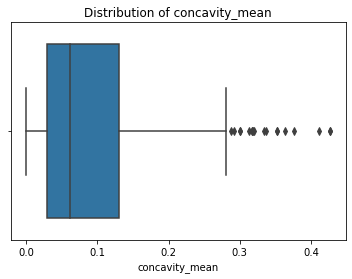

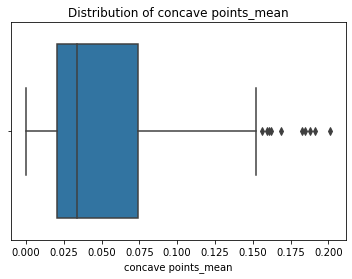

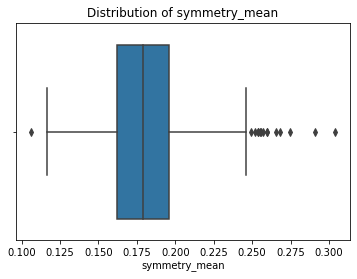

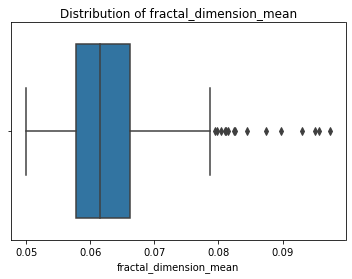

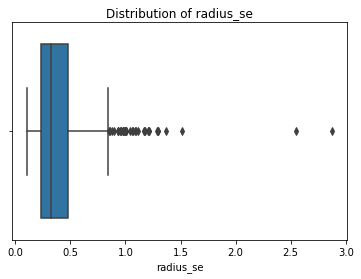

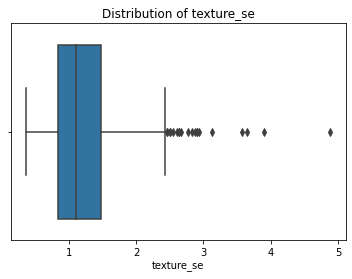

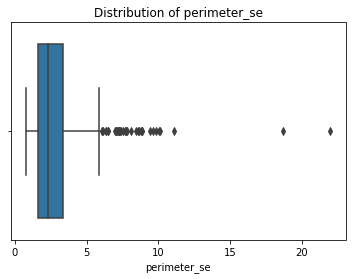

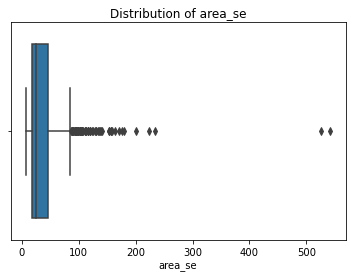

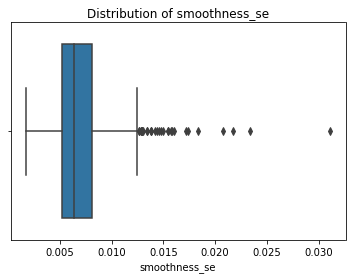

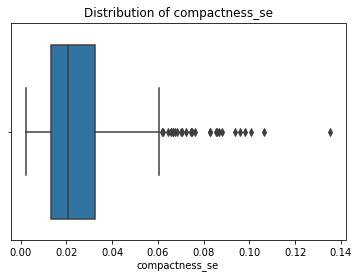

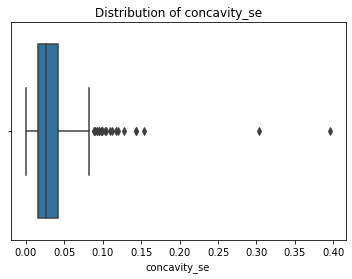

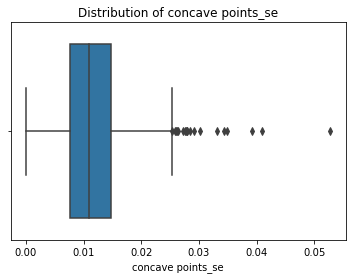

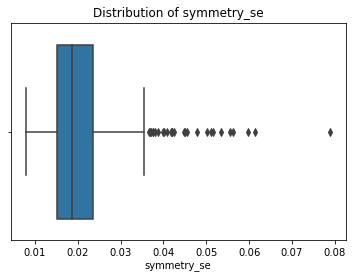

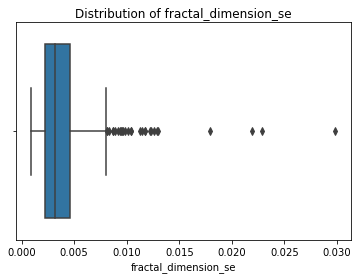

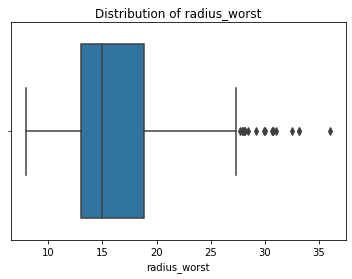

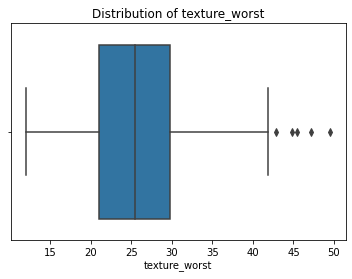

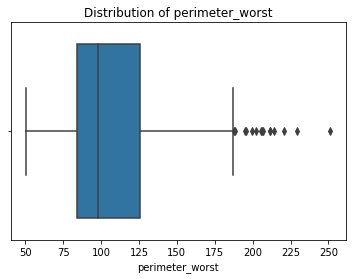

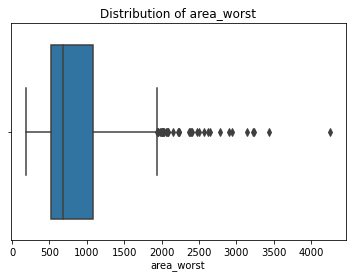

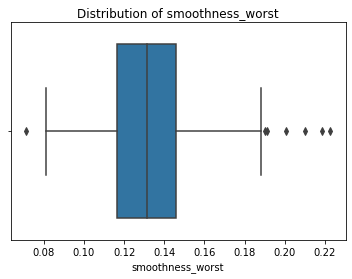

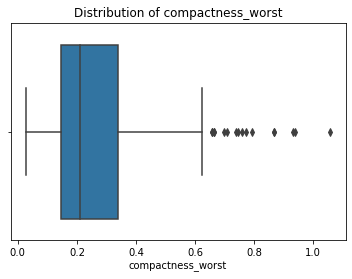

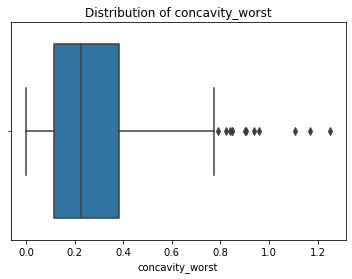

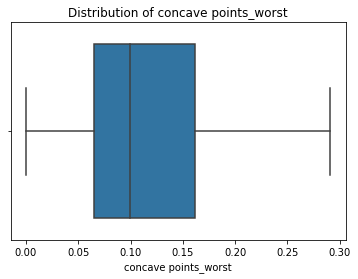

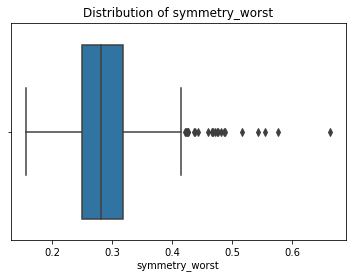

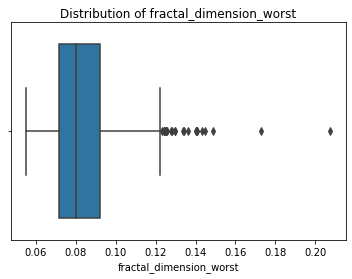

In [6]:
for i in range(len(df1.columns)):
    sns.boxplot(x = df1[df1.columns[i]])
    plt.title(f"Distribution of {df1.columns[i]}")
    plt.xlabel(df1.columns[i])
    plt.show()
#ignore diagnosis as its target variable

<AxesSubplot:>

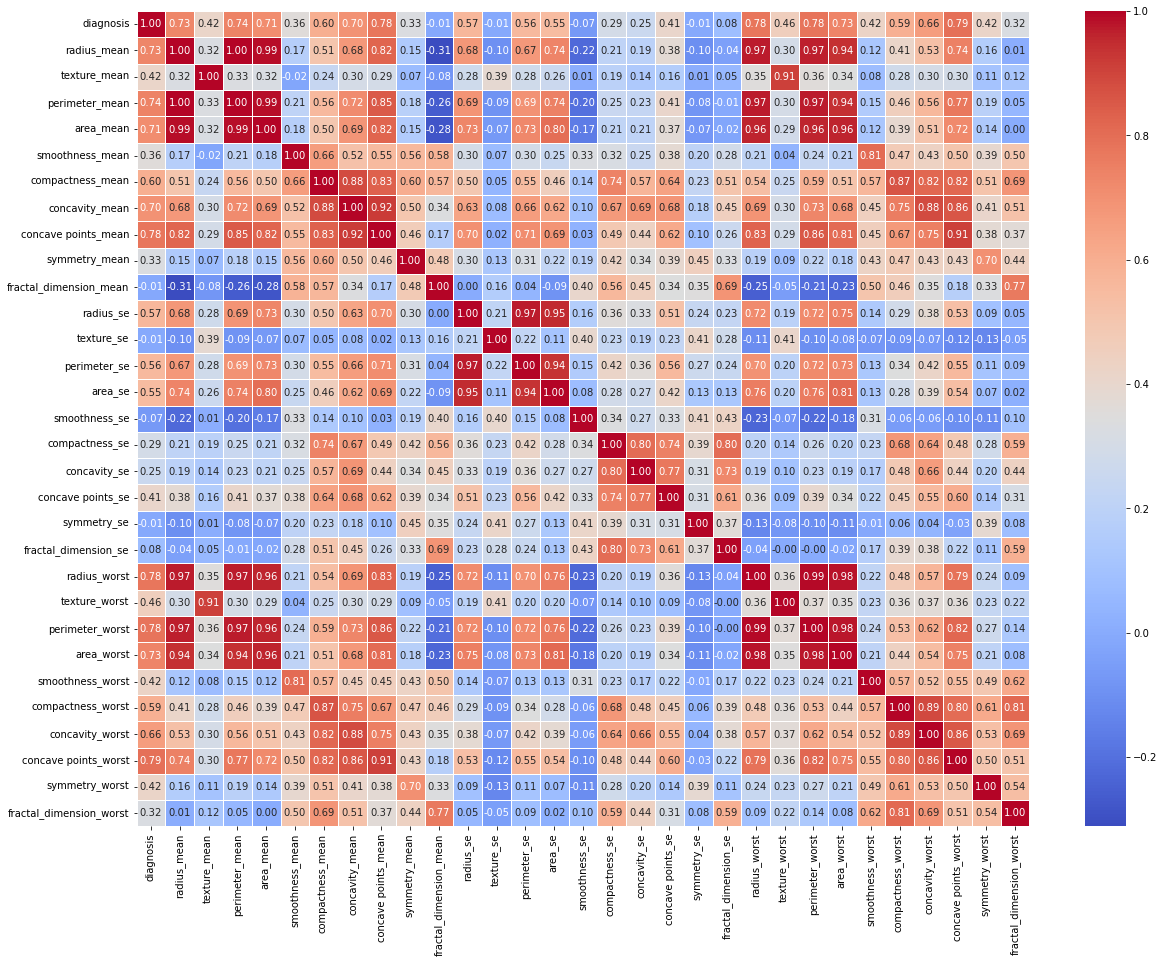

In [7]:
fig, ax = plt.subplots(figsize=(20, 15))
corr_matrix1 = df1.corr()
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt='.2f', ax = ax, linewidths=0.5)

In [8]:
print(df1.shape)
df1.columns

(569, 31)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df1 = df1.drop(['texture_mean', 'smoothness_mean', 'symmetry_mean', 'texture_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst'], axis = 1)
df1.shape

(569, 21)

In [10]:
df1.to_csv("Dataset(Large).csv")

In [11]:
df2 = pd.read_csv("hitters.csv")
pd.set_option("display.max_columns",None) 
print(df2.shape)
df2.head()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [12]:
dfSummary(df2)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,AtBat[int64],Mean (sd) : 380.9 (153.4)min < med < max:16.0 < 379.5 < 687.0IQR (CV) : 256.8 (2.5),247 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABW0lEQVR4nO3cMW6DMBiGYTeKBIO7kqEbF0gukEP0BF5zLU6QrTfqUGYWJCR6gSSyBTg//t5nthRHL7JNFPiY59mhfId3TwB5HHN/YNM03977U8zYYRj++r6/bz0nBdlDe+9PIYTfmLFd131tPR8V2UNvhZXitWJCW1gpUi425/JecMWEtiDlYnMu79bEqVsEoUWYXrrHcby0bXuLGTtN09k5F71sWpDy/Zbu56ZDV1X1mXDAum49n7Ulfr9F+zlLtwhCiyC0CEKLMH0YsyDl1y7LJ3/J0Cm3NXVdn0MIPzFjLZ/8JUOXftv2CHu0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CMn/jO3R0ue0CL0TS5/TYukWQWgRhBZBaBFPD2O8zqksT0NbeJ0T1rPK7VXp7xopwSqhFR9a2xsOYyIILYLQIv4B6kR8jmfT4hgAAAAASUVORK5CYII="">",0(0.0%)
2,Hits[int64],Mean (sd) : 101.0 (46.5)min < med < max:1.0 < 96.0 < 238.0IQR (CV) : 73.0 (2.2),144 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABRElEQVR4nO3aMW6DMBhAYbeKxOKuZOjGBdoL9BA9AWuvxQlyqg5lZkFCoicIxYpxUr/3zUhBeuLHxH5a1zWofs/3vgGVcSr9g23bfsYYz3uunabpZxzHy9H3RFA8dIzx3Pf9955rh2F4Pfp+KBzdEIaGMDSEoSEMDVF81Z1inuf3ruu+9lzrp9i2hw7dNM2Ln2J5OLohDA3x0KM7he/zbdWE9n2+zdENUc0TnYI45pGhiWPe0Q1haAhDQxgaArkYS1HLCt3Qf6hlhe7ohsjyRKcc4V2W5S2EsOsJUT5ZQice4f3I8ZtK4+iGMDSEoSEMDWFoCENDGBrC0BD+151RygZICGU3QQydUcoGSAhlN0Ec3RCGhjA0hKEhDA1haAhDQ/gdfUclT5heDe05sOOVPGF6NbTnwOriOxrC0BAuxv6JWxduv9D2iK+beAX9AAAAAElFTkSuQmCC"">",0(0.0%)
3,HmRun[int64],Mean (sd) : 10.8 (8.7)min < med < max:0.0 < 8.0 < 40.0IQR (CV) : 12.0 (1.2),36 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABUElEQVR4nO3cMa6CQBRG4dG8hGZssXjdbEA34AqsXAGta6JjBW9Vr5CahoQEV4DOTa4D8T9fTZTkJMOVEXbzPAd8v/3aJ4Ayfjw+pK7rW4zxmHPsMAyPvu//PL4X+VxCxxiPTdP85xzbdd2vx3fChqVbBKFFEFoEoUUsDmOWSXqaplMIIWsYwzoWQxsn6YvfKeETWLpFEFoEoUUQWgShRRBaBKFFEFqEyzalxTiO55TSPedY9q79FA9dVdWBvevyWLpFEFoEoUUQWgShRRBaBKFFEFoEoUUQWkTxW6AW3Bf3s+nQlvvibdteU0o86Ldg06Et2Cx5jWu0CEKL+Jql20JxyJMMrXg9Z+kWQWgRhBYheY3+FMsz5SGUHfQI7cjyTHkIZQc9Qr9h+Sm25Tc/EPoN40+xzb75gWFMBKFFEFoEoUUwjK2o5OYKoVdU8h80T8J2ggu8J/olAAAAAElFTkSuQmCC"">",0(0.0%)
4,Runs[int64],Mean (sd) : 50.9 (26.0)min < med < max:0.0 < 48.0 < 130.0IQR (CV) : 38.8 (2.0),96 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABUklEQVR4nO3bsW2EMBhAYSeKROO0XJGOBZIFMkQmoM1aTJCpUoSaBgmJTHAJ1hlz+L2vRjqkp/vB9t3Duq5B9Xs8+gZUxlPpD2zb9iPGeNly7TRNP+M4fu19TwTFQ8cYL33ff2+5dhiGl73vh8LRDWFoCENDGBrC0BCGhjA0RPF1dIp5nt+6rvvccq2bK3+769BN0zy7uZKHoxvC0BBZRnfKQcWyLK8hhE3jWPlkCZ14UPGe4zNvQTxBu+uXsb0QT9B8RkMYGsLQEIaGqOZlLGW7lLjEqyZ04nbp4Uu80hzdEIaGMDSEoSEMDVHNW/deavmVi6H/UcuvXBzdEIaGMDSEoSEMDWFoCENDuI7OKGVzJYSyGyyGzihlcyWEshssjm4IQ0MYGsLQEFdfxvzjXF2uhj7bH+fOqORZt8urA5U86/YZDeE3+iRuHfOGPolbx/wvjgeGx5WBi9AAAAAASUVORK5CYII="">",0(0.0%)
5,RBI[int64],Mean (sd) : 48.0 (26.2)min < med < max:0.0 < 44.0 < 121.0IQR (CV) : 36.8 (1.8),103 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABT0lEQVR4nO3bsQ2CQBiG4dOY0JwtFnYsoAs4hBPQuhYTOJWF1DQkJNjYiveH48T73qcmQPKGHz1gM46jQ/62vz4BpLFLfcCyLK/e+0PItl3XPdu2vS99TgqSh/beH+q6foRs2zTNcenzUcHoFkFoEYQWQWgRhBZBaBGEFpH8f7RF3/fnqqpuIduyuDJt1aGLotizuBIHo1sEoUUQWgShRRBaBKFFEFoEoUWsesHEglW0admEZhVtGqNbRJQr2vJm5zAMJ+dc0JWHeKKENr7ZeYlxTNgwukUQWgShRRBaBKFFEFpENitjS8nl609Cf5HL15+MbhGEFiE5ui2PNC1r85b9Opf2ni4Z2vhIM3ht3rLf976T3dMZ3SIILeLj6OYZc1

In [13]:
df2 = df2.drop(['League','Division','NewLeague'], axis = 1)
df2.shape

(322, 17)

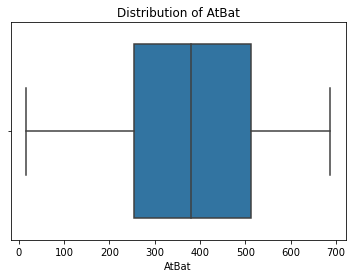

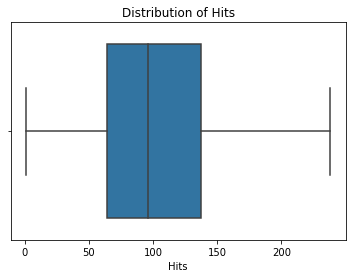

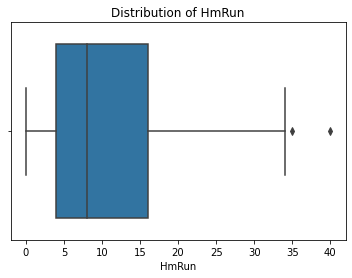

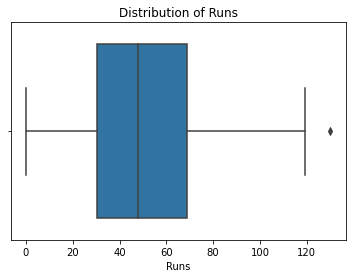

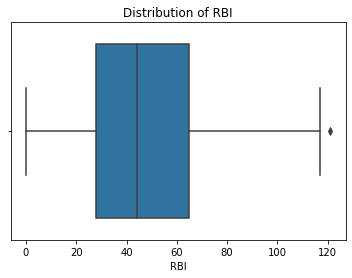

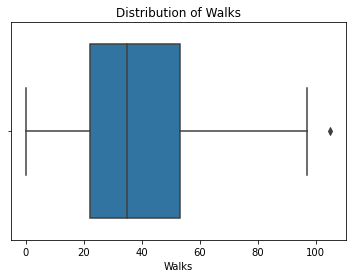

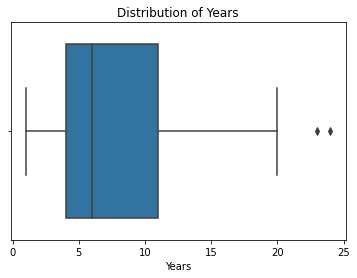

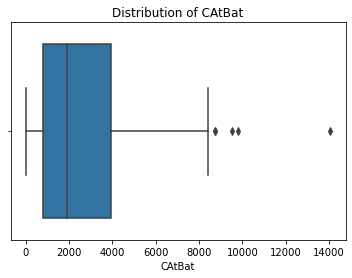

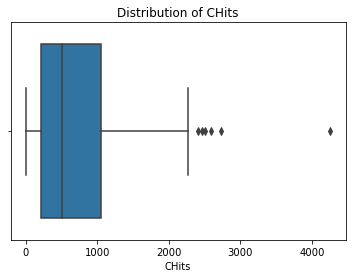

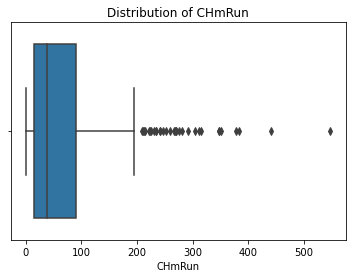

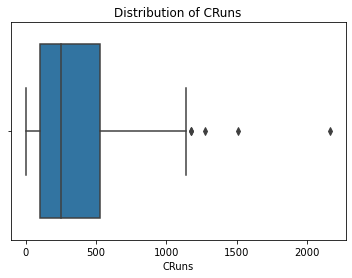

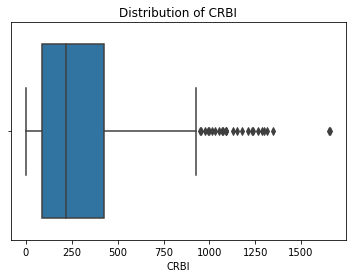

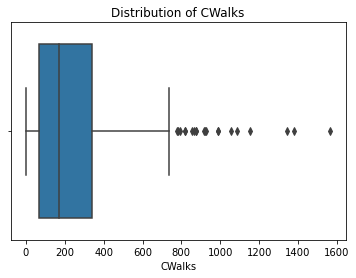

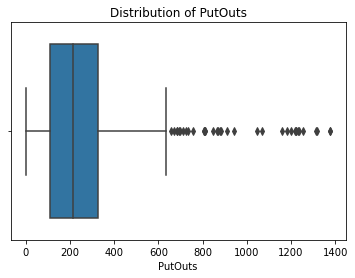

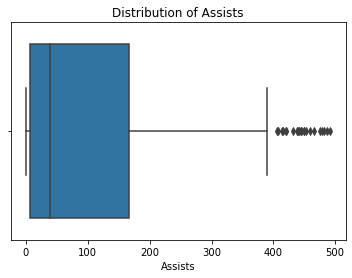

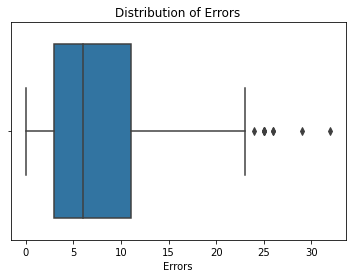

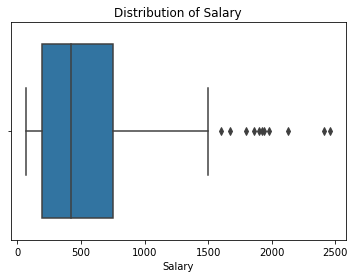

In [14]:
for i in range(len(df2.columns)):
    sns.boxplot(x = df2[df2.columns[i]])
    plt.title(f"Distribution of {df2.columns[i]}")
    plt.xlabel(df2.columns[i])
    plt.show()

In [15]:
df2.Salary.fillna(df2.Salary.median(),inplace=True)

<AxesSubplot:>

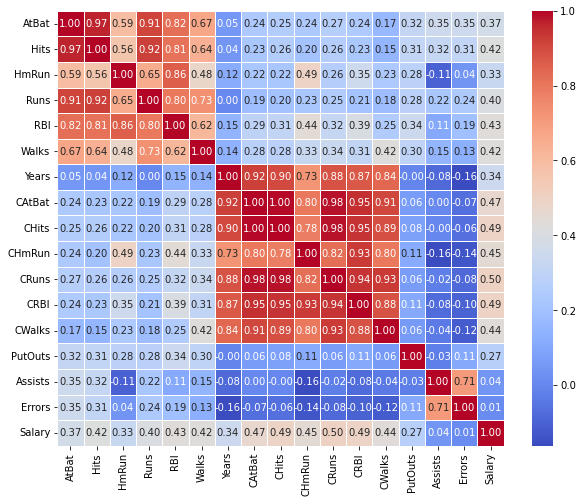

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix2 = df2.corr()
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True, fmt='.2f', ax = ax, linewidths=0.5)

In [17]:
df2 = df2.drop(['Runs','CHits','PutOuts','Assists','Errors'],axis = 1)
#Code block for making csv of df2

In [18]:
df2.to_csv("Dataset(Medium)")
df2.shape

(322, 12)

In [19]:
df3 = pd.read_csv("USArrests.csv")
df3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
df3 = df3.drop(['Unnamed: 0'], axis = 1)
df3.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [21]:
dfSummary(df3)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Murder[float64],Mean (sd) : 7.8 (4.4)min < med < max:0.8 < 7.2 < 17.4IQR (CV) : 7.2 (1.8),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABSUlEQVR4nO3ZsW2EMBhAYSeKROO0XJGOBZIFMkQmoL21mCBTXXHUNEhIZAIiWwec4b2vRndIT7J/7Jd5noPO7/XZL6B9vD37Bf5T1/VPjPGS8uwwDPe+73+3fqejKjp0jPHStu0t5dmu6z62fp8jc+mGMDSEoSFW2aMdmsq3SmiHpvK5dEMYGsLQEIaGMDSEoSEMDWFoCENDFH1NmWMcx6+maa4pzxKPYU8Tuqqqd49hl7l0QxgawtAQi3t0zh3zNE2fIYSk/TFnaMr53a2c5a59MXTmHfN36h9mDk3Jv7uVs9y1u3RDGBrC0BCGhjjNyVgJcr4oQth3Sjf0inK+KELYd0p36YYwNIShIZB7dCnHsHveoSNDl3IMu+cduks3hKEhDA2B3KOP6NHBzdAH8ejg5tINYWgIQ0MYGsLQEIaGMDSEoSEMDfEHbAWGv66dCs8AAAAASUVORK5CYII="">",0(0.0%)
2,Assault[int64],Mean (sd) : 170.8 (83.3)min < med < max:45.0 < 159.0 < 337.0IQR (CV) : 140.0 (2.0),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABRklEQVR4nO3ZMWqFQBRA0UkI2Exaf5HODSQbyCKyAttsyxVkVSlibSMIZgUfHNSn33tPLThyYRzePM3znHR9z0cvQDFeol9Y1/VXzvm25NlhGP76vv/Ze00E4aFzzre2bX+XPNt13dve66Fw64YwNIShIQwNYWgIQ0MYGsLQEIaGuDsZO8OochzHj6Zpvo9cw1XcDX2GUWVVVa9Hr+Eq3LohDA1haIjwa8orKznAphR7gDT0hkoOsCnFHiDduiEMDWFoCENDGBrC0BCGhjA0hKEhNpmMldwbT9P0nlJaPD3aYw0lo8eSsWbpt0Xet28SuvDe+HOLd65cw+LRY+G9fNG3Rd63u3VDGBrC0BDIa8ozHB6jIUOf4fAYza0bwtAQhoZA/qMf0dopmqEfxNopmls3hKEhDA1haAhDQxgawtAQhoYwNMQ/Bm+Gu8gjJywAAAAASUVORK5CYII="">",0(0.0%)
3,UrbanPop[int64],Mean (sd) : 65.5 (14.5)min < med < max:32.0 < 66.0 < 91.0IQR (CV) : 23.2 (4.5),36 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABT0lEQVR4nO3bsWnEMABAUSUE3Citr0gTvECyQIbIBGqzlie4KW6PNCni2o3B4ExwIMFJdu7/Vwsj+KCTpfPDtm1B9+9x7wmojae9J7CHvu8/Y4ynnLHzPP9O03SuPafakKFjjKeU0k/O2HEcX2rPpwWXbghDQxgaAvkbfRQtN4WG3lHLTaFLN4ShIQwNYWgIQ0MYGsLQEIaGMDRE85OxWsd+Jc9d1/UthJB1IrUsy/swDF85Y498d908dK1jv8LnfuQ+t+u653u4u3bphjA0hKEhDn1NWbIRKtlgER06dOFGKHuDReTSDWFoCENDGBri0Jux/6bkLSGEtkexhr6hkreEENoexbp0QxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSGuXlMWfjrzGmP8zhnrvzX3cTV06ScuKaVL7tjcyel2XLohDA1haIg/WUJ5dmN1y/UAAAAASUVORK5CYII="">",0(0.0%)
4,Rape[float64],Mean (sd) : 21.2 (9.4)min < med < max:7.3 < 20.1 < 46.0IQR (CV) : 11.1 (2.3),48 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABWklEQVR4nO3asU3EMABAUYOQ0pg2V9CgLAAL3BA3QVrWygRMwR40FKROEylSGODuwBZOcsr/r7Z0lr7k+GzfzfMctH/3W09A63hY+wfruj7FGA8pY4dh+O77/n3pORGsHjrGeGjb9itlbNd1T0vPh8KlG8LQEIaGWP0bnWMcx9emad5Sxrpx+91Nh66q6tGNWxku3RCGhjA0hKEhDA1haAhDQ1z9H+0t075cDe0t0764dEMYGsLQEEUuNXJumaZpegkhJH37l5oDcfNYJHTmLdOxxG/+cw64zaNLN4ShIQwNYWgIQ0MYGsLQEIaGuOnnvkshnqIhQxNP0Vy6IQwNYWgI5Dc6x142bob+w142bi7dEIaGcOneUObb+ecY42fi2LO9gqE3lPl2/ti27Ufi2LO9gks3hKEhDA3hN7qgnMOVEJZ7436JoQvKOVwJYbk37pe4dEMYGsLQED+ScoWSREiYTAAAAABJRU5ErkJggg=="">",0(0.0%)


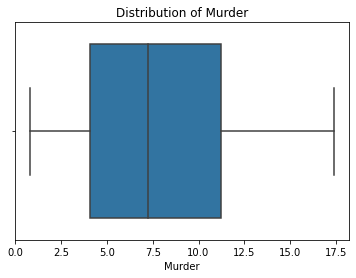

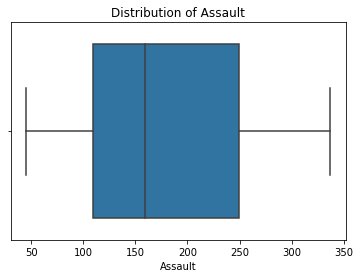

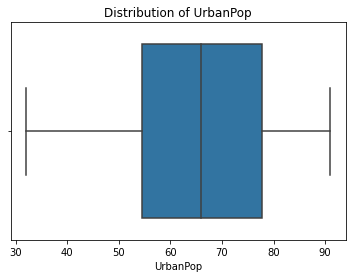

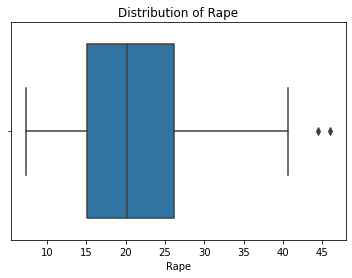

In [22]:
for i in range(len(df3.columns)):
    sns.boxplot(x = df3[df3.columns[i]])
    plt.title(f"Distribution of {df3.columns[i]}")
    plt.xlabel(df3.columns[i])
    plt.show()

<AxesSubplot:>

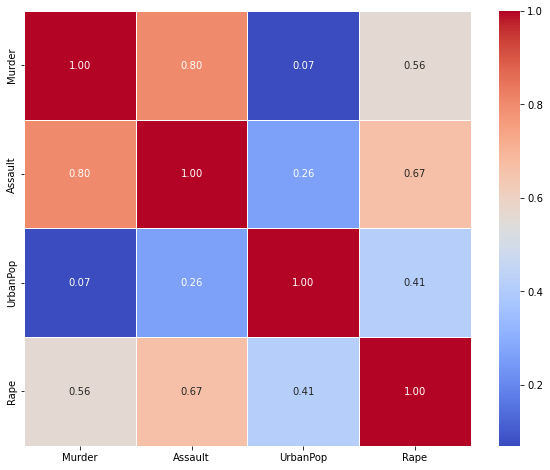

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix3 = df3.corr()
sns.heatmap(corr_matrix3, cmap='coolwarm', annot=True, fmt='.2f', ax = ax, linewidths=0.5)

In [24]:
df3.to_csv("Dataset(Small).csv")
df3.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
